# Einführung in Supervised Learning

In diesem Notebook werden die Grundlagen des Supervised Learning eingeführt, welches einen der zentralen Ansätze im Machine Learning bildet. Du erfährst, was Supervised Learning ist, für welche Art von Problemen es eingesetzt wird und wirst anhand eines Beispiels eine Intuition für diese Methode entwickeln.

### Lernziele
Am Ende des Notebooks kannst du:
- den Begriff **Supervised Learning** verständlich erklären und von **Unsupervised Learning** abgrenzen,
- die Begriffe **Klassifikation** und **Regression** unterscheiden und ihre typische Anwendungsfälle benennen,
- nachvollziehen, wie Modelle aus Daten lernen, indem sie Fehler minimieren,
- ein geeignetes Problem mittels **linearer Regression** mit `scikit-learn` lösen

Dieses Wissen bildet die Grundlage für die folgenden Kapitel, in denen du Klassifikationsmodelle wie **Logistische Regression** und **Random Forests** selbst implementieren und anwenden wirst. Also, los geht's!

## Was ist Supervised Learning?

Supervised Learning ist ein Sammelbegriff für Modelle, die mit _beschrifteten Daten_ trainiert werden. Das sind Daten, bei denen für jede Eingabe ($X$) bereits das zugehörige Ergebnis ($y$) bekannt ist. Das Ziel ist eines Supervised Learning-Modells ist es, aus den Daten eine Funktion zu erstellen, die _neuen, unbekannten_ Eingaben eine gute Vorhersage zuordnen kann. Die Qualität dieser Vorhersagen hängt von der Menge und der Qualität der zur Verfügung stehenden Daten ab.

Ein Supervised-Learning-Problem besteht demnach aus zwei Hauptbestandteilen:
1. **Eingabedaten** $X$ – die Merkmale (oder _Features_), die das Modell erhält, um eine Vorhersage zu treffen.
2. **Zielvariable** $y$ – das Ergebnis (oder _Label_), das wir mit Hilfe der Eingabedaten vorhersagen wollen.

### Beispiele für Supervised Learning

- **Vorhersage des Preises** eines Hauses basierend auf dessen Fläche, Standort und Anzahl der Zimmer. 
- **Klassifizierung von E-Mails** in „Spam“ oder „Nicht-Spam“ basierend auf dem Inhalt und der Struktur der Nachricht.
- **Vorhersage des Produktionsausstoßes** basierend auf Maschineneinstellungen und Umgebungsfaktoren.

### Supervised Learning: Typen

Die Beispiele oben enthalten schond die zwei grundlegenden Typen des Supervised Learning: **Regression** und **Klassifikation**.

1. **Regression**: Bei einer Regressionsaufgabe wird eine **kontinuierliche Zielvariable** vorhergesagt. Das Ziel ist es, eine Funktion zu finden, die die Eingabewerte in kontinuierliche Werte überführt. Ein Beispiel ist die Vorhersage des Aktienkurses oder der Temperatur.
  
2. **Klassifikation**: Bei einer Klassifikationsaufgabe wird eine **diskrete Zielvariable** vorhergesagt. Hierbei handelt es sich um eine festgelegte Anzahl an Klassen, und das Ziel ist es, die Eingabe in eine dieser Klassen zuzuordnen. Ein Beispiel ist die Kategorisierung von Bildern in „Hund“, „Katze“ oder „Pferd“.

# Lineare Regression
Bevor wir uns in einem zweiten Notebook der Klassifikation zuwenden, starten wir mit der Regression – also mit Vorhersagen kontinuierlicher Werte. Der Grund: Viele der zentralen Ideen des Supervised Learning wie **Modellierung**, **Fehlerminimierung** und **Trainingsprinzipien** lassen sich an Regressionsaufgaben besonders gut erklären.

Wir konzentrieren uns dabei auf das einfachste Regressionsmodell: die **lineare Regression**.
Anhand der linearen Regression lernen wir, die drei Zutaten zu verstehen, die für ein Regressionsmodell notwendig sind:

- 1. Das Modell der Vorhersage zu formulieren,
- 2. Den Fehler der Vorhersage zu quantifizieren,
- 3. Den Fehler der Vorhersage zu minimieren.

Anschließend setzen wir ein einfaches Beispiel mit `scikit-learn` um, um den gesamten Ablauf praktisch nachzuvollziehen.

Diese Grundlagen helfen dir im zweiten Notebook, die **logistische Regression** für Klassifikationsprobleme besser zu verstehen – denn sie basiert auf dem gleichen Rezept, verwendet jedoch andere Zutaten.

## Was ist lineare Regression?

Die lineare Regression ist eines der grundlegendsten Modelle im Supervised Learning. Sie dient dazu, eine **lineare Beziehung** zwischen einer oder mehreren Eingabegrößen (*Features*) und einer Zielgröße (*Label*) zu modellieren. Die Idee: Finde eine Gerade, die möglichst gut durch die gegebenen Datenpunkte passt.

### Zutat 1: Das Modell - Die Gerade

Im linearen Fall (mit nur einem Feature) sieht das Modell also so aus:

$$
\hat{y} = w \cdot x + b
$$

* $x$: Eingabewert (z. B. die Fläche eines Hauses)
* $\hat{y}$: vorhergesagter Zielwert (z. B. der Hauspreis)
* $w$: Gewicht (Steigung der Geraden)
* $b$: Bias (Achsenabschnitt)

Ziel ist es, die Parameter $w$ und $b$ so zu wählen, dass die Gerade möglichst gut zu den vorhandenen Daten passt.

<center><img src="https://miro.medium.com/v2/resize:fit:922/1*_qoaFqMVgjstmtJNp-zNrw.png"></center>

**Achtung:**
Es sollte klar sein, dass die Annahme einer linearen Beziehung zwischen den Features und dem Label nicht immer gerechtfertigt ist. Beispielsweise ist der Zusammenhang zwischen der Außentemperatur und dem Stromverbrauch **nicht linear** – bei sehr niedrigen **und** sehr hohen Temperaturen steigt der Verbrauch, während er in einem mittleren Bereich eher konstant bleibt. In solchen Fällen kann ein lineares Modell die Realität **nur unzureichend abbilden**, und komplexere Modelle wie Polynomregressionen oder nichtlineare Verfahren (z. B. Entscheidungsbäume oder neuronale Netze) sind besser geeignet.

### Zutat 2: Die Verlustfunktion - Der Mean Squared Error

Damit das Modell „lernt“, brauchen wir ein Maß dafür, wie gut (oder schlecht) eine bestimmte Wahl von $w$ und $b$ ist. Dafür verwenden wir eine **Verlustfunktion**. Bei der linearen Regression ist das typischerweise der **mittlere quadratische Fehler (Mean Squared Error, MSE)**:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

* $y_i$: tatsächlicher Zielwert
* $\hat{y}_i$: vorhergesagter Zielwert ($w \cdot x + b$)
* $n$: Anzahl der Trainingsbeispiele

Die Funktion misst die Abweichung zwischen den Vorhersagen des Modells ($\hat{y}_i$) und den wirklichen Werten ($y_i$), quadriert diese Abweichung und summiert sie über alle Trainingsdaten. Die Funktion ist durch die Quadrierung immer größer als 0 und wird nur 0, wenn die Vorhersage in jedem Punkt mit dem richtigen Wert übereinstimmt.
Durch die Quadrierung wiegen kleine Fehler übrigens auch weniger als große Fehler, beziehungsweise: Ausreißer dominieren den MSE-Fehler.

**Praktische Übung:**
In der Folgenden Zelle kannst du ein Gefühl dafür bekommen, wie die MSE-Funktion funktioniert. Führe die Zelle aus und benutze die Slider, um einen möglichst geringen MSE-Wert zu erreichen. Kannst du dir vorstellen, warum der geringste MSE-Wert nicht exakt bei den "richtigen" Parameterwerten ($w=2$, $b=1$) erreicht wird?

**Weiterführende Aufgabe:**
Füge im Code einen zusätzlichen Ausreißer-Datenpunkt hinzu und beobachte, wie sich der MSE-Wert verändert. Beschreibt die Gerade mit dem geringsten Verlust die Datenpunkte immer noch gut?

In [ ]:
!git clone https://github.com/wolfromanlist/MLForEngineers.git
%cd MLForEngineers/Notebooks/

import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, clear_output

from google.colab import output
output.enable_custom_widget_manager()

# Daten vorbereiten
generator = np.random.default_rng(2948292983384)
x = np.linspace(0, 20, 20)
y_real = 2 * x + 1 + 10 * (generator.random((1, 20)) - 0.5)
y_real = y_real.flatten()

def my_line(w, b, x):
    return w * x + b

def mse(y_real, y_predicted):
    return 1 / len(y_real) * np.sum((y_real - y_predicted) ** 2)

# Initiale Werte
init_w = 1.0
init_b = 0.0

# Sliders
w_slider = widgets.FloatSlider(value=init_w, min=1, max=4, step=0.1, description="w")
b_slider = widgets.FloatSlider(value=init_b, min=-1, max=4, step=0.1, description="b")
output = widgets.Output()

def update(change=None):
    with output:
        clear_output(wait=True)
        w = w_slider.value
        b = b_slider.value
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=x, y=y_real, mode='markers', name='Daten'))
        fig.add_trace(go.Scatter(x=x, y=my_line(w, b, x), mode='lines', name='Linie', line=dict(color='blue')))
        fig.update_layout(
            title={"text": f"MSE: {mse(y_real, my_line(w, b, x)):.2f}", "x": 0.5},
            xaxis_title="x",
            yaxis_title="y",
            width=800,
            height=500
        )
        fig.show()

# Callbacks verbinden
m_slider.observe(update, names="value")
b_slider.observe(update, names="value")

# Anzeigen
display(widgets.HBox([b_slider, w_slider]))
display(output)

# Initiales Zeichnen
update()


Output()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

from RegressionWidget_Plotly import RegressionWidget

# Daten vorbereiten
generator = np.random.default_rng(2948292983384)
x = np.linspace(0, 20, 20)
y_real = 2 * x + 1 + 10 * (generator.random((1, 20)) - 0.5)
y_real = y_real.flatten()

widget = RegressionWidget()

### Zutat 3: Die Minimierung des Fehlers

Das Ziel des Trainings ist es, die Werte von $w$ und $b$ so zu wählen, dass der MSE möglichst klein wird. Dafür gibt es verschiedene Verfahren – z. B. die **analytische Lösung durch Ordinary Least Squares (OLS)** oder die **iterative Optimierung mit Gradient Descent**.

In diesem Notebook verwenden wir zunächst die OLS-Methode, da sie eine anschauliche, mathematisch exakte Lösung liefert. Dem Gradient Descent-Verfahren werden wir uns in späteren Lektionen zu neuronalen Netzen noch widmen.

![Least Squares](https://kenndanielso.github.io/mlrefined/mlrefined_images/superlearn_images/Least_Squares.png)

### Vergleich: Supervised Learning vs. Unsupervised Learning

Während das Supervised Learning auf **beschrifteten Daten** basiert, arbeitet das **Unsupervised Learning** mit **unbeschrifteten Daten**. Bei unbeschrifteten Daten sind die Zielvariablen nicht bekannt – das Modell hat nur die Eingabedaten $X$ zur Verfügung, ohne dass für diese Eingaben Zielwerte existieren. Das Ziel des Unsupervised Learning ist es daher nicht, eine bestimmte Zielvariable vorherzusagen, sondern **Strukturen oder Muster** innerhalb der Daten zu erkennen.

#### Unterschiede zwischen Supervised und Unsupervised Learning

| Merkmal               | Supervised Learning                         | Unsupervised Learning                            |
|-----------------------|---------------------------------------------|--------------------------------------------------|
| **Zielvariable**      | Vorhersage eines bekannten Labels           | Keine Zielvariable, da keine Labels vorhanden    |
| **Trainingsdaten**    | Beschriftete Daten (mit $X$ und $y$)| Unbeschriftete Daten (nur $X$)               |
| **Ziel**              | Vorhersagen treffen oder klassifizieren     | Muster, Cluster oder Strukturen entdecken        |
| **Beispiel**          | Preisvorhersage, Spam-Klassifikation        | Kundensegmentierung, Anomalie-Erkennung          |
| **Typische Algorithmen** | Lineare Regression, Entscheidungsbäume, Neuronale Netze | K-Means Clustering, PCA, Assoziationsanalyse    |

#### Beispiele für Unsupervised Learning

- **Kundensegmentierung**: Gruppen von Kunden mit ähnlichen Eigenschaften oder Verhaltensmustern erkennen, um zielgerichtete Marketingstrategien zu entwickeln.
- **Anomalieerkennung**: Anomale Datenpunkte, wie z.B. Betrugsversuche bei Kreditkarten, identifizieren.
- **Dimensionalitätsreduktion**: Mit Verfahren wie Principal Component Analysis (PCA) die Anzahl der Variablen reduzieren, um die Daten zu vereinfachen und gleichzeitig die wesentlichen Informationen zu bewahren.

---

### Zusammenfassung

**Supervised Learning** verwendet beschriftete Daten, um eine Funktion zu erlernen, die Vorhersagen für eine Zielvariable treffen kann. Die Ergebnisse sind entweder kontinuierliche Werte (Regression) oder diskrete Kategorien (Klassifikation). Im Gegensatz dazu verwendet **Unsupervised Learning** unbeschriftete Daten und ist darauf ausgelegt, Strukturen oder Muster in den Daten zu finden, ohne dass spezifische Zielwerte vorgegeben sind.

Dieser Unterschied ist grundlegend, da er bestimmt, welche Algorithmen und Ansätze jeweils verwendet werden und wie die Ergebnisse interpretiert werden können. Supervised Learning eignet sich für Vorhersage- und Klassifikationsprobleme, während Unsupervised Learning ideal ist, um versteckte Muster oder Anomalien in den Daten zu entdecken.

### 1. Aufgabe zur Einschätzung von Regression und Klassifikation

**Aufgabe**: Für jedes der folgenden Probleme sollst du entscheiden, ob es sich um ein Problem der **Regression** oder **Klassifikation** handelt. Beachte: Ein Problem gehört nicht zum Supervised Learning und erfordert eine andere Herangehensweise.

1. Vorhersage des **Gewichts eines Bauteils** basierend auf dessen Materialdichte und Volumen.
2. Bestimmung, ob ein **Bauteil fehlerhaft** ist („Ja“ oder „Nein“) anhand von Messdaten.
3. Vorhersage der **Temperatur in einer Produktionsanlage** basierend auf den bisher gemessenen Temperaturen.
4. Kategorisierung eines Bauteils als **leicht, mittelschwer oder schwer** anhand von Gewicht und Volumen.
5. Gruppierung von Bauteilen in **verschiedene Klassen ohne vorgegebene Kategorien** basierend auf ihrer Form und Oberflächenbeschaffenheit.

---

### 2. Regressionsanalyse: Theorie und Konzept

In diesem Abschnitt schauen wir uns das Konzept der **linearen Regression** genauer an, das ein sehr einfaches und grundlegendes Modell für die Vorhersage kontinuierlicher Werte ist.

#### Was ist lineare Regression?

- Die lineare Regression beschreibt eine einfache, **lineare Beziehung zwischen einer unabhängigen Variable** (oft als `X` bezeichnet) und einer **abhängigen Variable** `y`, die vorhergesagt werden soll.
- Ziel der linearen Regression ist es, eine **lineare Funktion** zu finden, die die Beziehung zwischen den Eingabemerkmalen (Features) und der Zielvariablen möglichst gut beschreibt.

#### Mathematischer Hintergrund

- Die Funktion der linearen Regression lässt sich als einfache Gleichung beschreiben:
  $y = m \cdot X + b$
  - $y$: vorhergesagte Zielvariable (das Ergebnis, das wir berechnen wollen, z.B. `fare`),
  - $X$: unabhängige Variable (das Merkmal, das als Eingabe verwendet wird, z.B. `age`),
  - $m$: Steigung der Geraden, die den Anstieg der Beziehung zwischen $X$ und $y$ angibt,
  - $b$: Achsenabschnitt, der die Position der Geraden verschiebt.

- **Ziel**: Die Parameter $m$ und $b$ so zu bestimmen, dass die Linie die Punkte im Datensatz möglichst gut beschreibt.

#### Verlustfunktion: Mean Squared Error (MSE)

- Um die „beste“ Linie zu finden, benötigt unser Modell eine Metrik, um unseren Modelloutput zu bewerten. Das ist eine Funktion, die unsere Modelloutputwerte $y$ annimmt, und einen Wert ausgibt, der uns sagt, wie gut unser Modell performt. Metriken sind meistens durch Abstandsfunktionen inspiriert. Das heißt sie sind größer als 0 und werden nur 0, wenn unser Modelloutput mit den zu fittenden Daten komplett übereinstimmt. Im einfachsten Fall verwendet die lineare Regression eine **Verlustfunktion** namens **Mean Squared Error (MSE)**, die den Fehler zwischen den tatsächlichen und den vorhergesagten Werten misst.
- Die MSE ist definiert als:
  $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
  - $y_i$: der tatsächliche Wert der Zielvariable,
  - $\hat{y}_i$: der vorhergesagte Wert der Zielvariable,
  - $n$: Anzahl der Datenpunkte.

### 2. Minimierung der Residuen – Optimierungsalgorithmen

Um die **Residuen** (die Abweichungen zwischen den tatsächlichen und vorhergesagten Werten) in einer linearen Regression zu minimieren, werden verschiedene **Optimierungsalgorithmen** verwendet. Hier sind die gängigsten:

1. **Gradient Descent**: Dieser Algorithmus sucht iterativ nach der „besten“ Linie, indem er schrittweise die Parameter (Steigung und Achsenabschnitt) in die Richtung verändert, in der die Fehlerfunktion (z.B. Mean Squared Error) am schnellsten abnimmt. Gradient Descent wird häufig für sehr große Datensätze und komplexe Modelle verwendet.

2. **Ordinary Least Squares (OLS)**: Der Algorithmus der kleinsten Quadrate ist ein analytisches Verfahren, das die Steigung und den Achsenabschnitt einer Linie so berechnet, dass die Summe der quadrierten Residuen minimiert wird. OLS ist für die meisten linearen Regressionsprobleme sehr effizient.

3. **Stochastic Gradient Descent (SGD)**: Eine Variante des Gradientenabstiegs, die auf zufällig ausgewählten Datenpunkten anstatt auf dem gesamten Datensatz arbeitet. Dies ermöglicht es, Modelle auch bei großen Datenmengen schnell und effizient zu optimieren.

**Welcher Algorithmus wird von `LinearRegression` in `scikit-learn` verwendet?**

- **scikit-learn** verwendet bei der `LinearRegression`-Klasse standardmäßig den **Ordinary Least Squares (OLS)**-Algorithmus.


### 1. Theoretischer Überblick: Ordinary Least Squares (OLS)

Der **Ordinary Least Squares (OLS)**-Algorithmus ist ein mathematisches Verfahren zur Bestimmung der „besten“ Parameter einer linearen Regression. Ziel des OLS ist es, die Werte der Parameter so zu berechnen, dass die Summe der quadrierten Abstände (Residuen) zwischen den tatsächlichen Zielwerten $y$ und den vorhergesagten Werten $\hat{y}$ minimiert wird.

#### Mathematische Grundlage

Die lineare Regression beschreibt eine Zielvariable $y$ als lineare Funktion der unabhängigen Variablen $X$:

$\hat{y} = X \beta$
wobei:
- $X$: Matrix der unabhängigen Variablen (Dimension $n \times p$, mit $n$ Datenpunkten und $p$ Variablen),
- $\beta$: Vektor der Parameter, die es zu bestimmen gilt (Dimension $p \times 1 $),
- $\hat{y}$: Vektor der vorhergesagten Werte (Dimension $ n \times 1 $).

Das Ziel des OLS ist es, die Parameter $\beta$ so zu wählen, dass der **Mean Squared Error (MSE)** minimiert wird:

$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

wobei $y_i$ die tatsächlichen Werte und $\hat{y}_i$ die durch das Modell vorhergesagten Werte sind.

![Least Squares](https://kenndanielso.github.io/mlrefined/mlrefined_images/superlearn_images/Least_Squares.png)

#### Lösung durch Ableitung

Um die Werte für $\beta$ zu bestimmen, wird die MSE als Funktion von $\beta$ abgeleitet und auf null gesetzt:
$\frac{\partial}{\partial \beta} \left( (y - X \beta)^T (y - X \beta) \right) = 0$
Dies ergibt die sogenannte **Normalengleichung**:
$\beta = (X^T X)^{-1} X^T y$
Hierbei:
- $X^T$ ist die Transponierte der Matrix $X$,
- $(X^T X)^{-1}$ ist die Inverse von $ X^T X$, vorausgesetzt, $ X^T X $ ist invertierbar.

Durch Lösen dieser Gleichung erhält man die optimalen Werte für die Parameter $\beta$, welche die Summe der quadrierten Residuen minimieren.

---

### 2. Anforderungen des OLS-Algorithmus

Für die Berechnung der Parameter in der OLS-Regression sind lediglich **lineare Algebra-Berechnungen** nötig, insbesondere Matrizenmultiplikation, Transponieren und Invertieren. Es werden **keine neuronalen Netze oder iterativen Trainingsverfahren** wie bei anderen Machine-Learning-Algorithmen verwendet. Stattdessen wird ein einmaliger analytischer Lösungsschritt durchgeführt, der die optimalen Parameterwerte direkt berechnet.

**Zusammengefasst benötigt OLS:**
- Eine Datenmatrix $X$ und einen Zielvektor $y$,
- Die Berechnung der Normalengleichung, die eine Lösung durch die Lösung von **Matrixgleichungen** liefert,
- Ein Modell ohne Backpropagation oder andere iterative Trainingsmethoden.

---

### 3. Diskussion: Ist lineare Regression Machine Learning?

Es gibt eine Diskussion darüber, ob lineare Regression tatsächlich als **Machine Learning** gezählt werden sollte oder ob sie besser als **statistisches Modell** betrachtet wird. Diese Debatte beruht auf der Tatsache, dass:

- **Machine Learning** typischerweise auf Verfahren basiert, die aus den Daten iterativ „lernen“ und auf Rückkopplung (wie Fehlerausgleich bei neuronalen Netzen) angewiesen sind. Lineare Regression hingegen ist ein **deterministisches Verfahren** und wird analytisch berechnet, ohne dass Lernschritte oder Fehleranpassungen erforderlich sind.
  
- **Statistik und Modellannahmen**: Lineare Regression stammt aus der Statistik und basiert auf Annahmen wie Normalverteilung und Homoskedastizität. Diese Annahmen werden in Machine-Learning-Methoden oft aufgeweicht oder vernachlässigt, was zu einer stärkeren Anpassung an reale, „unordentliche“ Daten führt.

#### Argumente, warum lineare Regression als Machine Learning betrachtet werden könnte:
1. **Vorhersagefähigkeit**: Lineare Regression wird für Vorhersagen eingesetzt, und die Nutzung von Daten für Vorhersagen ist ein zentraler Bestandteil des Machine Learnings.
2. **Teil vieler ML-Frameworks**: Lineare Regression ist in allen ML-Frameworks (wie `scikit-learn`) implementiert und wird in praktischen ML-Workflows oft angewandt.
3. **Modellbewertung und Anpassung**: Viele der Metriken und Evaluationsmethoden, die in ML für die Modellbewertung verwendet werden, wie der MSE oder der R²-Score, sind auch für lineare Regression relevant.

Zusammenfassend lässt sich sagen, dass die lineare Regression an der Grenze zwischen Statistik und Machine Learning liegt. Sie wird oft als „einfachstes“ Machine-Learning-Modell betrachtet, auch wenn sie auf analytischen Lösungen basiert und nicht wie andere Modelle durch iterative Optimierung lernt.

## Datenvorbereitung



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
import matplotlib.pyplot as plt

Datenüberblick:
   machines  fabrication_time
0         5         67.906597
1         7         56.106398
2         6         50.994477
3         5         63.666157
4         4         35.097613

Fehlende Werte:
 machines            0
fabrication_time    0
dtype: int64


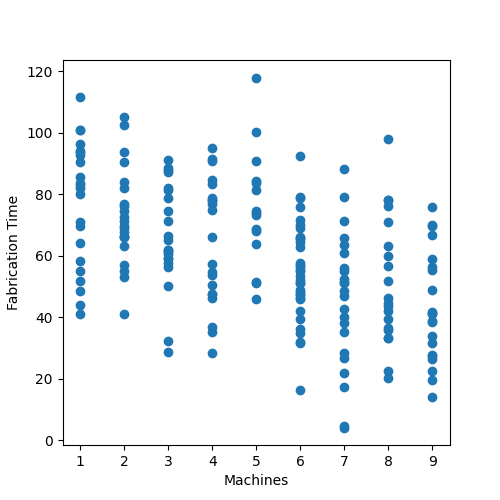


Erste Zeilen der standardisierten Trainingsdaten:
 [[ 0.36712254]
 [ 1.15031731]
 [-1.19926698]
 [-0.8076696 ]
 [ 0.75871992]]

Modell-Koeffizienten: [-10.46601926]
Modell-Achsenabschnitt: 61.01192151742241
Mean Absolute Error (MAE): 14.81
Mean Squared Error (MSE): 338.12
Root Mean Squared Error (RMSE): 18.39
R²-Score: 0.29


/Users/romanlist/Python Projects/scvenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



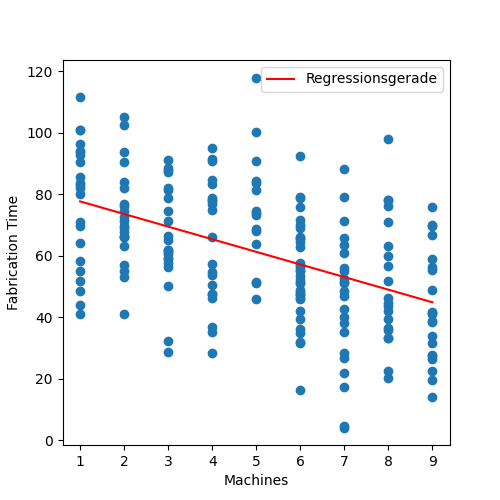

In [3]:
# Beispielhafte Datenerstellung
np.random.seed(0)  # für reproduzierbare Ergebnisse
data = {
    'machines': [5, 7, 6, 5, 4, 6, 4, 9, 9, 4, 8, 5, 6, 9, 1, 1, 1, 8, 8, 8, 9, 8, 5, 8, 2, 6, 2, 9, 5, 4, 3, 7, 5, 6, 1, 6, 6, 6, 9, 7, 4, 4, 7, 1, 7, 7, 2, 2, 3, 4, 6, 4, 9, 1, 2, 2, 6, 3, 5, 3, 2, 1, 6, 2, 2, 4, 8, 1, 8, 1, 9, 5, 9, 6, 7, 1, 3, 2, 3, 2, 3, 4, 1, 7, 6, 3, 5, 1, 6, 9, 3, 7, 2, 7, 3, 2, 6, 1, 8, 1, 7, 3, 7, 9, 3, 6, 6, 6, 3, 9, 5, 8, 7, 3, 8, 4, 8, 6, 8, 7, 7, 5, 9, 6, 4, 6, 1, 3, 6, 3, 6, 4, 2, 3, 6, 6, 6, 6, 6, 4, 9, 4, 4, 9, 8, 7, 1, 9, 7, 9, 2, 8, 2, 6, 2, 8, 8, 6, 4, 1, 7, 5, 7, 8, 9, 8, 1, 4, 7, 2, 5, 1, 2, 1, 8, 3, 4, 9, 7, 1, 2, 6, 6, 3, 9, 6, 5, 6, 7, 3, 4, 2, 2, 9, 7, 5, 3, 3, 1, 4],  # Anzahl Maschinen zwischen 1 und 10
    'fabrication_time': [67.90659729035198, 56.106398427806, 50.994476604973414, 63.666157089643946, 35.097612868648845, 32.039833707027626, 66.22680286228086, 40.91527383975611, 48.867428230641316, 77.69669211415139, 63.07560396856529, 45.89042085563238, 52.20593417172311, 27.30510517168884, 69.6177453658591, 82.13627375506708, 58.139671112137194, 39.315616233114596, 51.63499475754276, 97.85085245947315, 38.92949586215649, 78.14891087454242, 68.70782501306948, 46.16582567194396, 72.598794661039, 55.24179039710023, 41.11241643004889, 38.594792865390716, 51.16164124843421, 78.76401692708872, 56.239836533941755, 63.393261942848085, 83.52764098974014, 36.19921294222919, 55.182435834569766, 34.78883895358819, 46.38616051561113, 48.79466757223236, 34.02959683412472, 60.85055782908546, 90.67782246593318, 57.24481685489761, 47.037841141403355, 43.93312789297632, 78.96797772153707, 38.15826223175094, 71.21559600097471, 53.18216031548334, 28.853956747650273, 54.8303899393927, 45.80516278988078, 91.30537447515269, 69.97685723661004, 85.55656333629403, 104.97772561171456, 66.09947475701892, 62.764768325961676, 78.91392252447335, 74.64019759627901, 60.57725728949825, 56.9839969465905, 48.579830027949896, 47.20662557974444, 76.10314583605629, 93.62446896110454, 78.25812129758577, 44.74242472475136, 92.90755164421435, 43.64971697594392, 51.94064887049821, 56.39644485754042, 90.70268368121174, 14.028412708516182, 78.80920713092596, 4.6665365589671595, 80.16239734546595, 87.07945827760282, 66.1492734651707, 61.71733893473774, 68.9224748880462, 91.22202398311339, 84.46341633231, 94.00935416779004, 35.15987349227268, 47.69852376864201, 32.252887170234516, 73.12243955878206, 64.07761682282565, 65.86885886438505, 66.61652799986359, 88.49868073361267, 51.28827909191848, 82.02019094615521, 21.761545210594083, 87.99994772467629, 66.34439226208434, 16.47192323984454, 100.83222689115654, 76.21779733731799, 96.38388383772445, 65.72419493485988, 74.38527268575467, 26.80197950654918, 41.50446924010041, 61.863283328424366, 39.49800007684461, 68.990817803787, 53.26751660288785, 82.06237501921653, 31.630927077808536, 100.29992291148659, 59.793839611242916, 52.44257667219292, 65.23336887096886, 22.58095393190783, 53.855828713502596, 42.04839568709444, 64.40929844078353, 78.14569130983777, 17.404842492156654, 39.96031919794722, 51.54856532411142, 22.497316809208563, 31.746408303106108, 75.03445230345193, 57.15307858769192, 70.93343144333274, 81.22225806773736, 65.32378568074694, 66.57938969449042, 55.00847205146495, 83.17390262742492, 55.071565260184684, 59.108692254001305, 71.71103849542581, 75.91439407068657, 66.13749142380996, 51.2733879726916, 69.86123409331486, 47.53081979399407, 27.760562662587123, 50.34416051459668, 46.18057304022479, 41.80371755987022, 70.9469549397791, 42.6864364658868, 90.58356187823917, 69.81565342227196, 51.46703718049807, 26.478380717491632, 83.98950295344697, 33.24094688557501, 63.23721436234395, 48.317552109618454, 74.41215717296778, 56.72007643826732, 36.45774949036193, 79.18680519315623, 47.59243427550278, 83.60323955938493, 4.170699399782073, 81.27226622532305, 28.2539005830036, 35.90818049938248, 55.36494198159164, 33.354080512296676, 111.58309016181767, 76.91591586973249, 88.28705314452364, 67.76371772175122, 84.42891096771852, 82.94001419515943, 102.57108923015268, 100.94158243174151, 20.3685513106142, 50.13523568533148, 94.93894016992677, 19.665713605376006, 71.19992123859808, 93.79698096311375, 90.31444059009648, 56.3076148363576, 57.55097075036535, 71.25084953116342, 76.0042650733056, 92.47032958489332, 117.9433607884537, 41.89113000579377, 48.62170549792494, 58.786490510900165, 36.729371870689526, 69.83217866088724, 76.74098645018402, 58.98636579202069, 54.94520268498698, 73.98676297983195, 61.28824021252155, 57.78097284709512, 41.01048210648257, 28.48348413537319]  # Zielvariable: Fertigungszeit
}

df = pd.DataFrame(data)

# Überblick über die Daten
print("Datenüberblick:")
print(df.head())

# Überprüfen auf fehlende Werte
print("\nFehlende Werte:\n", df.isnull().sum())

# Aufteilen in Features (X) und Zielvariable (y)
X = df[['machines']]
y = df['fabrication_time']

fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(X, y)
plt.xlabel('Machines')
plt.ylabel('Fabrication Time')
plt.show()

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardisieren der Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nErste Zeilen der standardisierten Trainingsdaten:\n", X_train[:5]) # standard scaler transformiert dataframe zu numpy array! Gängige df-Methoden nicht anwendbar

from sklearn.linear_model import LinearRegression

# Modellinitialisierung und Training
model = LinearRegression()
model.fit(X_train, y_train)

# Ausgabe der Modellparameter
print("\nModell-Koeffizienten:", model.coef_)
print("Modell-Achsenabschnitt:", model.intercept_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Vorhersagen auf den standardisierten Testdaten
y_pred = model.predict(X_test)

# Berechnung der Metriken auf der Originalskala
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Ausgabe der Metriken
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R²-Score: {r2:.2f}")

fig, ax = plt.subplots(figsize=(5,5))
x = np.arange(1,10)
ax.plot(x, model.coef_ * scaler.transform(x.reshape(-1,1)) + model.intercept_, color = 'red', label='Regressionsgerade')
ax.scatter(X, y)
plt.xlabel('Machines')
plt.ylabel('Fabrication Time')
plt.legend()
plt.show()



In [4]:
# Beispielhafte Datenerstellung
np.random.seed(0)  # für reproduzierbare Ergebnisse
data = {
    'machines': [5, 7, 6, 5, 4, 6, 4, 9, 9, 4, 8, 5, 6, 9, 1, 1, 1, 8, 8, 8, 9, 8, 5, 8, 2, 6, 2, 9, 5, 4, 3, 7, 5, 6, 1, 6, 6, 6, 9, 7, 4, 4, 7, 1, 7, 7, 2, 2, 3, 4, 6, 4, 9, 1, 2, 2, 6, 3, 5, 3, 2, 1, 6, 2, 2, 4, 8, 1, 8, 1, 9, 5, 9, 6, 7, 1, 3, 2, 3, 2, 3, 4, 1, 7, 6, 3, 5, 1, 6, 9, 3, 7, 2, 7, 3, 2, 6, 1, 8, 1, 7, 3, 7, 9, 3, 6, 6, 6, 3, 9, 5, 8, 7, 3, 8, 4, 8, 6, 8, 7, 7, 5, 9, 6, 4, 6, 1, 3, 6, 3, 6, 4, 2, 3, 6, 6, 6, 6, 6, 4, 9, 4, 4, 9, 8, 7, 1, 9, 7, 9, 2, 8, 2, 6, 2, 8, 8, 6, 4, 1, 7, 5, 7, 8, 9, 8, 1, 4, 7, 2, 5, 1, 2, 1, 8, 3, 4, 9, 7, 1, 2, 6, 6, 3, 9, 6, 5, 6, 7, 3, 4, 2, 2, 9, 7, 5, 3, 3, 1, 4],  # Anzahl Maschinen zwischen 1 und 10
    'complexity': [2, 3, 2, 1, 1, 1, 3, 2, 3, 4, 4, 1, 3, 2, 1, 4, 2, 2, 3, 4, 3, 4, 2, 4, 1, 4, 3, 1, 4, 3, 2, 1, 3, 1, 1, 2, 2, 2, 2, 3, 4, 1, 3, 1, 3, 2, 3, 1, 1, 2, 2, 4, 4, 3, 4, 1, 3, 3, 4, 2, 1, 1, 1, 4, 3, 4, 2, 3, 1, 2, 4, 4, 2, 4, 1, 4, 4, 4, 3, 4, 2, 4, 3, 1, 2, 1, 4, 2, 2, 3, 2, 1, 4, 1, 3, 1, 1, 4, 4, 4, 4, 4, 2, 1, 2, 1, 1, 1, 3, 1, 4, 1, 1, 1, 3, 1, 2, 3, 4, 3, 2, 1, 1, 2, 2, 2, 3, 3, 2, 2, 1, 4, 1, 3, 4, 4, 2, 2, 3, 2, 2, 1, 2, 1, 4, 1, 3, 2, 3, 4, 3, 1, 2, 3, 3, 3, 2, 1, 2, 4, 1, 4, 3, 2, 4, 2, 3, 2, 4, 3, 3, 2, 4, 3, 1, 1, 4, 4, 2, 3, 4, 2, 4, 3, 4, 4, 4, 1, 3, 2, 1, 2, 2, 4, 1, 4, 2, 2, 1, 1],  # Komplexitätsskala von 1 bis 4
    'fabrication_time': [67.90659729035198, 56.106398427806, 50.994476604973414, 63.666157089643946, 35.097612868648845, 32.039833707027626, 66.22680286228086, 40.91527383975611, 48.867428230641316, 77.69669211415139, 63.07560396856529, 45.89042085563238, 52.20593417172311, 27.30510517168884, 69.6177453658591, 82.13627375506708, 58.139671112137194, 39.315616233114596, 51.63499475754276, 97.85085245947315, 38.92949586215649, 78.14891087454242, 68.70782501306948, 46.16582567194396, 72.598794661039, 55.24179039710023, 41.11241643004889, 38.594792865390716, 51.16164124843421, 78.76401692708872, 56.239836533941755, 63.393261942848085, 83.52764098974014, 36.19921294222919, 55.182435834569766, 34.78883895358819, 46.38616051561113, 48.79466757223236, 34.02959683412472, 60.85055782908546, 90.67782246593318, 57.24481685489761, 47.037841141403355, 43.93312789297632, 78.96797772153707, 38.15826223175094, 71.21559600097471, 53.18216031548334, 28.853956747650273, 54.8303899393927, 45.80516278988078, 91.30537447515269, 69.97685723661004, 85.55656333629403, 104.97772561171456, 66.09947475701892, 62.764768325961676, 78.91392252447335, 74.64019759627901, 60.57725728949825, 56.9839969465905, 48.579830027949896, 47.20662557974444, 76.10314583605629, 93.62446896110454, 78.25812129758577, 44.74242472475136, 92.90755164421435, 43.64971697594392, 51.94064887049821, 56.39644485754042, 90.70268368121174, 14.028412708516182, 78.80920713092596, 4.6665365589671595, 80.16239734546595, 87.07945827760282, 66.1492734651707, 61.71733893473774, 68.9224748880462, 91.22202398311339, 84.46341633231, 94.00935416779004, 35.15987349227268, 47.69852376864201, 32.252887170234516, 73.12243955878206, 64.07761682282565, 65.86885886438505, 66.61652799986359, 88.49868073361267, 51.28827909191848, 82.02019094615521, 21.761545210594083, 87.99994772467629, 66.34439226208434, 16.47192323984454, 100.83222689115654, 76.21779733731799, 96.38388383772445, 65.72419493485988, 74.38527268575467, 26.80197950654918, 41.50446924010041, 61.863283328424366, 39.49800007684461, 68.990817803787, 53.26751660288785, 82.06237501921653, 31.630927077808536, 100.29992291148659, 59.793839611242916, 52.44257667219292, 65.23336887096886, 22.58095393190783, 53.855828713502596, 42.04839568709444, 64.40929844078353, 78.14569130983777, 17.404842492156654, 39.96031919794722, 51.54856532411142, 22.497316809208563, 31.746408303106108, 75.03445230345193, 57.15307858769192, 70.93343144333274, 81.22225806773736, 65.32378568074694, 66.57938969449042, 55.00847205146495, 83.17390262742492, 55.071565260184684, 59.108692254001305, 71.71103849542581, 75.91439407068657, 66.13749142380996, 51.2733879726916, 69.86123409331486, 47.53081979399407, 27.760562662587123, 50.34416051459668, 46.18057304022479, 41.80371755987022, 70.9469549397791, 42.6864364658868, 90.58356187823917, 69.81565342227196, 51.46703718049807, 26.478380717491632, 83.98950295344697, 33.24094688557501, 63.23721436234395, 48.317552109618454, 74.41215717296778, 56.72007643826732, 36.45774949036193, 79.18680519315623, 47.59243427550278, 83.60323955938493, 4.170699399782073, 81.27226622532305, 28.2539005830036, 35.90818049938248, 55.36494198159164, 33.354080512296676, 111.58309016181767, 76.91591586973249, 88.28705314452364, 67.76371772175122, 84.42891096771852, 82.94001419515943, 102.57108923015268, 100.94158243174151, 20.3685513106142, 50.13523568533148, 94.93894016992677, 19.665713605376006, 71.19992123859808, 93.79698096311375, 90.31444059009648, 56.3076148363576, 57.55097075036535, 71.25084953116342, 76.0042650733056, 92.47032958489332, 117.9433607884537, 41.89113000579377, 48.62170549792494, 58.786490510900165, 36.729371870689526, 69.83217866088724, 76.74098645018402, 58.98636579202069, 54.94520268498698, 73.98676297983195, 61.28824021252155, 57.78097284709512, 41.01048210648257, 28.48348413537319]  # Zielvariable: Fertigungszeit
}

df = pd.DataFrame(data)

# Überblick über die Daten
print("Datenüberblick:")
print(df.head())

# Überprüfen auf fehlende Werte
print("\nFehlende Werte:\n", df.isnull().sum())

# Aufteilen in Features (X) und Zielvariable (y)
X = df[['machines', 'complexity']]
y = df['fabrication_time']

fig = go.Figure()

# Scatter plot of actual values
fig.add_trace(go.Scatter3d(
    x=X['machines'], y=X['complexity'], z=y,
    mode='markers',
    marker=dict(size=4, color='blue', opacity=0.5),
    name='Actual Fabrication Time'
))

fig.update_layout(
    title="Fabrication Time: Machines vs Complexity",
    scene=dict(
        xaxis_title="Machines",
        yaxis_title="Complexity",
        zaxis_title="Fabrication Time"
    ),
    width=700, height=600
)

fig.show()


# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardisieren der Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nErste Zeilen der standardisierten Trainingsdaten:\n", X_train[:5]) # standard scaler transformiert dataframe zu numpy array! Gängige df-Methoden nicht anwendbar


Datenüberblick:
   machines  complexity  fabrication_time
0         5           2         67.906597
1         7           3         56.106398
2         6           2         50.994477
3         5           1         63.666157
4         4           1         35.097613

Fehlende Werte:
 machines            0
complexity          0
fabrication_time    0
dtype: int64



Erste Zeilen der standardisierten Trainingsdaten:
 [[ 0.36712254  1.28435589]
 [ 1.15031731 -0.47956636]
 [-1.19926698  0.40239476]
 [-0.8076696  -1.36152749]
 [ 0.75871992  1.28435589]]


## Modellbildung

In [5]:
from sklearn.linear_model import LinearRegression

# Modellinitialisierung und Training
model = LinearRegression()
model.fit(X_train, y_train)

# Ausgabe der Modellparameter
print("\nModell-Koeffizienten:", model.coef_)
print("Modell-Achsenabschnitt:", model.intercept_)



Modell-Koeffizienten: [-10.19263862  12.1339451 ]
Modell-Achsenabschnitt: 61.01192151742241


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Vorhersagen auf den standardisierten Testdaten
y_pred = model.predict(X_test)

# Berechnung der Metriken auf der Originalskala
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Ausgabe der Metriken
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R²-Score: {r2:.2f}")

Mean Absolute Error (MAE): 11.60
Mean Squared Error (MSE): 221.84
Root Mean Squared Error (RMSE): 14.89
R²-Score: 0.53


In [7]:
coefs = model.coef_
intercept = model.intercept_

def best_fit_plane(x, y, coef1, coef2, intercept):
    return coef1 * x + coef2 * y + intercept


# Rücktransformation der Standardisierung für X_test, um die Originalskala zu erhalten
print(X_test[:5])
X_test_original = scaler.inverse_transform(X_test)
print(X_test_original[:5])

# Plot 1: Machines vs Complexity vs Fabrication Time
x_vals_original = X_test_original[:, 0]  # Machines
y_vals_original = X_test_original[:, 1]  # Complexity

fig = go.Figure()

# Scatter plot of actual values
fig.add_trace(go.Scatter3d(
    x=x_vals_original, y=y_vals_original, z=y_test,
    mode='markers',
    marker=dict(size=4, color='blue', opacity=0.5),
    name='Actual Fabrication Time'
))

# Scatter plot of predicted values
fig.add_trace(go.Scatter3d(
    x=x_vals_original, y=y_vals_original, z=y_pred,
    mode='markers',
    marker=dict(size=4, color='red', opacity=0.5),
    name='Predicted Fabrication Time'
))

x_mesh, y_mesh = np.meshgrid(np.linspace(x_vals_original.min(), x_vals_original.max(), 2),
                             np.linspace(y_vals_original.min(), y_vals_original.max(), 2))


# Standardisiere die Gitterwerte, um sie in das Modell einsetzen zu können
x_mesh_scaled = scaler.transform(np.c_[x_mesh.ravel(), y_mesh.ravel()])[:, 0]
y_mesh_scaled = scaler.transform(np.c_[x_mesh.ravel(), y_mesh.ravel()])[:, 1]


# Berechne die z-Werte für die Best-Fit-Plane auf Basis der skalierten Gitterwerte
z_mesh = best_fit_plane(x_mesh_scaled, y_mesh_scaled, coefs[0], coefs[1], intercept).reshape(x_mesh.shape)

fig.add_trace(go.Surface(
    x=x_mesh, y=y_mesh, z=z_mesh,
    colorscale='Viridis',
    opacity=0.5,
    showscale=False,
    name='Best Fit Plane'
))

# Customize layout
fig.update_layout(
    title="Fabrication Time: Machines vs Complexity",
    scene=dict(
        xaxis_title="Machines",
        yaxis_title="Complexity",
        zaxis_title="Fabrication Time"
    ),
    width=700, height=600
)

fig.show()

[[ 1.15031731  0.40239476]
 [-0.02447484  0.40239476]
 [ 0.36712254 -1.36152749]
 [ 1.15031731  1.28435589]
 [ 1.54191469  1.28435589]]
[[8. 3.]
 [5. 3.]
 [6. 1.]
 [8. 4.]
 [9. 4.]]


/Users/romanlist/Python Projects/scvenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/Users/romanlist/Python Projects/scvenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [36]:
def generate_linear_data(n_samples=200, coef1=2.0, coef2=3.0, intercept=5.0, noise_level=1.0,
                         x1_range=(0, 10), x2_range=(0, 10), x1_type=float, x2_type=float, random_state=0):
    """
    Erzeugt synthetische Daten mit einer linearen Abhängigkeit zwischen zwei Eingangsvariablen und einer Zielvariable,
    plus zufälligem Rauschen. Ermöglicht die Einstellung der Wertebereiche und Datentypen für x1 und x2.

    Parameters:
        n_samples (int): Anzahl der zu generierenden Datenpunkte.
        coef1 (float): Koeffizient für die erste Eingangsvariable.
        coef2 (float): Koeffizient für die zweite Eingangsvariable.
        intercept (float): Achsenabschnitt (y-Achsenwert, wenn x1 und x2 null sind).
        noise_level (float): Standardabweichung des zufälligen Rauschens.
        x1_range (tuple): Wertebereich (min, max) für x1.
        x2_range (tuple): Wertebereich (min, max) für x2.
        x1_type (type): Datentyp für x1 (int oder float).
        x2_type (type): Datentyp für x2 (int oder float).
        random_state (int): Seed für den Zufallszahlengenerator zur Reproduzierbarkeit.

    Returns:
        pd.DataFrame: Ein DataFrame mit den Spalten 'x1', 'x2' und 'y', wobei 'y' linear von 'x1' und 'x2' abhängt.
    """
    np.random.seed(random_state)

    # Generiere Eingangsvariablen x1 und x2 innerhalb des angegebenen Bereichs und Typs
    x1 = np.random.uniform(x1_range[0], x1_range[1], n_samples).astype(x1_type)
    x2 = np.random.uniform(x2_range[0], x2_range[1], n_samples).astype(x2_type)

    # Berechne Zielvariable y mit Rauschen
    y = coef1 * x1 + coef2 * x2 + intercept + np.random.normal(0, noise_level, n_samples)

    # Erstelle den DataFrame
    data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
    return data

# Beispiel: Generiere Daten mit einer linearen Abhängigkeit und definierten Wertebereichen für x1 und x2
data = generate_linear_data(n_samples=200, coef1=-4.5, coef2=10.0, intercept= 60.0, noise_level=15.0,
                            x1_range=(1, 10), x2_range=(1, 5), x1_type=int, x2_type=int)

# Zeige die ersten Zeilen der generierten Daten an
print([data['x2'][i] for i in range(200)])


[2, 3, 2, 1, 1, 1, 3, 2, 3, 4, 4, 1, 3, 2, 1, 4, 2, 2, 3, 4, 3, 4, 2, 4, 1, 4, 3, 1, 4, 3, 2, 1, 3, 1, 1, 2, 2, 2, 2, 3, 4, 1, 3, 1, 3, 2, 3, 1, 1, 2, 2, 4, 4, 3, 4, 1, 3, 3, 4, 2, 1, 1, 1, 4, 3, 4, 2, 3, 1, 2, 4, 4, 2, 4, 1, 4, 4, 4, 3, 4, 2, 4, 3, 1, 2, 1, 4, 2, 2, 3, 2, 1, 4, 1, 3, 1, 1, 4, 4, 4, 4, 4, 2, 1, 2, 1, 1, 1, 3, 1, 4, 1, 1, 1, 3, 1, 2, 3, 4, 3, 2, 1, 1, 2, 2, 2, 3, 3, 2, 2, 1, 4, 1, 3, 4, 4, 2, 2, 3, 2, 2, 1, 2, 1, 4, 1, 3, 2, 3, 4, 3, 1, 2, 3, 3, 3, 2, 1, 2, 4, 1, 4, 3, 2, 4, 2, 3, 2, 4, 3, 3, 2, 4, 3, 1, 1, 4, 4, 2, 3, 4, 2, 4, 3, 4, 4, 4, 1, 3, 2, 1, 2, 2, 4, 1, 4, 2, 2, 1, 1]
